## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  14.803326   460.960717  0.633217  5.560869  292.208251
1  12.296352   251.420057  0.937848  2.622572  236.018779
2  30.852866  1253.956619  0.339872  7.798325  427.324436
3  57.704159  1108.274678  0.866157  5.084184  961.665465
4  42.647049   234.095797  0.260843  8.845996   74.572282


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9486500	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9382068	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9283603	total: 59ms	remaining: 19.6s
3:	learn: 0.9156315	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9023894	total: 59.8ms	remaining: 11.9s
5:	learn: 0.8911932	total: 60.4ms	remaining: 10s
6:	learn: 0.8784060	total: 60.8ms	remaining: 8.63s
7:	learn: 0.8665757	total: 61.4ms	remaining: 7.61s
8:	learn: 0.8559989	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8447819	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8339232	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8223943	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8094808	total: 64.3ms	remaining: 4.88s
13:	learn: 0.7973570	total: 64.8ms	remaining: 4.56s
14:	learn: 0.7854533	total: 65.2ms	remaining: 4.28s
15:	learn: 0.7759234	total: 65.7ms	remaining: 4.04s
16:	learn: 0.7647357	total: 66.1ms	remaining: 3.82s
17:	learn: 0.7563254	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7478245	total: 67ms	remaining: 3.46s

120:	learn: 0.2357301	total: 109ms	remaining: 789ms
121:	learn: 0.2328777	total: 109ms	remaining: 786ms
122:	learn: 0.2308690	total: 110ms	remaining: 782ms
123:	learn: 0.2289441	total: 110ms	remaining: 779ms
124:	learn: 0.2267769	total: 111ms	remaining: 775ms
125:	learn: 0.2252078	total: 111ms	remaining: 771ms
126:	learn: 0.2236152	total: 112ms	remaining: 767ms
127:	learn: 0.2213697	total: 112ms	remaining: 763ms
128:	learn: 0.2190499	total: 112ms	remaining: 759ms
129:	learn: 0.2169082	total: 113ms	remaining: 755ms
130:	learn: 0.2148457	total: 113ms	remaining: 752ms
131:	learn: 0.2130721	total: 114ms	remaining: 748ms
132:	learn: 0.2111215	total: 114ms	remaining: 744ms
133:	learn: 0.2091706	total: 114ms	remaining: 740ms
134:	learn: 0.2074464	total: 115ms	remaining: 736ms
135:	learn: 0.2060543	total: 115ms	remaining: 733ms
136:	learn: 0.2041333	total: 116ms	remaining: 729ms
137:	learn: 0.2022143	total: 116ms	remaining: 725ms
138:	learn: 0.2006229	total: 117ms	remaining: 722ms
139:	learn: 

302:	learn: 0.0682946	total: 186ms	remaining: 427ms
303:	learn: 0.0680652	total: 186ms	remaining: 426ms
304:	learn: 0.0675503	total: 187ms	remaining: 425ms
305:	learn: 0.0673329	total: 187ms	remaining: 424ms
306:	learn: 0.0670853	total: 187ms	remaining: 423ms
307:	learn: 0.0666575	total: 188ms	remaining: 422ms
308:	learn: 0.0661436	total: 188ms	remaining: 421ms
309:	learn: 0.0659108	total: 189ms	remaining: 420ms
310:	learn: 0.0656921	total: 189ms	remaining: 419ms
311:	learn: 0.0651958	total: 190ms	remaining: 418ms
312:	learn: 0.0647561	total: 190ms	remaining: 417ms
313:	learn: 0.0645406	total: 191ms	remaining: 416ms
314:	learn: 0.0643273	total: 191ms	remaining: 415ms
315:	learn: 0.0638939	total: 191ms	remaining: 414ms
316:	learn: 0.0636708	total: 192ms	remaining: 413ms
317:	learn: 0.0634638	total: 192ms	remaining: 412ms
318:	learn: 0.0630298	total: 193ms	remaining: 411ms
319:	learn: 0.0628088	total: 193ms	remaining: 410ms
320:	learn: 0.0626281	total: 193ms	remaining: 409ms
321:	learn: 

548:	learn: 0.0241635	total: 290ms	remaining: 239ms
549:	learn: 0.0240566	total: 291ms	remaining: 238ms
550:	learn: 0.0239898	total: 291ms	remaining: 237ms
551:	learn: 0.0239238	total: 292ms	remaining: 237ms
552:	learn: 0.0237781	total: 292ms	remaining: 236ms
553:	learn: 0.0236745	total: 293ms	remaining: 236ms
554:	learn: 0.0235352	total: 293ms	remaining: 235ms
555:	learn: 0.0234519	total: 293ms	remaining: 234ms
556:	learn: 0.0233514	total: 294ms	remaining: 234ms
557:	learn: 0.0232157	total: 294ms	remaining: 233ms
558:	learn: 0.0231000	total: 295ms	remaining: 233ms
559:	learn: 0.0230279	total: 295ms	remaining: 232ms
560:	learn: 0.0229066	total: 296ms	remaining: 231ms
561:	learn: 0.0228449	total: 296ms	remaining: 231ms
562:	learn: 0.0227487	total: 297ms	remaining: 230ms
563:	learn: 0.0226701	total: 297ms	remaining: 230ms
564:	learn: 0.0225396	total: 298ms	remaining: 229ms
565:	learn: 0.0224281	total: 298ms	remaining: 229ms
566:	learn: 0.0223350	total: 298ms	remaining: 228ms
567:	learn: 

723:	learn: 0.0112672	total: 368ms	remaining: 140ms
724:	learn: 0.0112119	total: 368ms	remaining: 140ms
725:	learn: 0.0111808	total: 369ms	remaining: 139ms
726:	learn: 0.0111504	total: 369ms	remaining: 139ms
727:	learn: 0.0110985	total: 370ms	remaining: 138ms
728:	learn: 0.0110404	total: 370ms	remaining: 138ms
729:	learn: 0.0110178	total: 370ms	remaining: 137ms
730:	learn: 0.0109721	total: 371ms	remaining: 136ms
731:	learn: 0.0109212	total: 371ms	remaining: 136ms
732:	learn: 0.0108676	total: 371ms	remaining: 135ms
733:	learn: 0.0108117	total: 372ms	remaining: 135ms
734:	learn: 0.0107823	total: 372ms	remaining: 134ms
735:	learn: 0.0107535	total: 373ms	remaining: 134ms
736:	learn: 0.0107019	total: 373ms	remaining: 133ms
737:	learn: 0.0106498	total: 374ms	remaining: 133ms
738:	learn: 0.0106216	total: 374ms	remaining: 132ms
739:	learn: 0.0105852	total: 374ms	remaining: 132ms
740:	learn: 0.0105639	total: 375ms	remaining: 131ms
741:	learn: 0.0105282	total: 375ms	remaining: 130ms
742:	learn: 

971:	learn: 0.0046213	total: 472ms	remaining: 13.6ms
972:	learn: 0.0045980	total: 473ms	remaining: 13.1ms
973:	learn: 0.0045922	total: 474ms	remaining: 12.6ms
974:	learn: 0.0045759	total: 474ms	remaining: 12.2ms
975:	learn: 0.0045703	total: 474ms	remaining: 11.7ms
976:	learn: 0.0045468	total: 475ms	remaining: 11.2ms
977:	learn: 0.0045298	total: 475ms	remaining: 10.7ms
978:	learn: 0.0045150	total: 476ms	remaining: 10.2ms
979:	learn: 0.0045095	total: 476ms	remaining: 9.72ms
980:	learn: 0.0044968	total: 477ms	remaining: 9.23ms
981:	learn: 0.0044775	total: 477ms	remaining: 8.74ms
982:	learn: 0.0044579	total: 478ms	remaining: 8.26ms
983:	learn: 0.0044525	total: 478ms	remaining: 7.77ms
984:	learn: 0.0044377	total: 479ms	remaining: 7.29ms
985:	learn: 0.0044232	total: 479ms	remaining: 6.8ms
986:	learn: 0.0044092	total: 480ms	remaining: 6.32ms
987:	learn: 0.0044039	total: 480ms	remaining: 5.83ms
988:	learn: 0.0043896	total: 481ms	remaining: 5.35ms
989:	learn: 0.0043830	total: 481ms	remaining: 4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

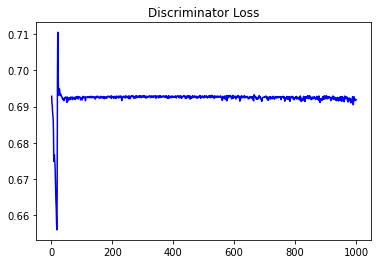

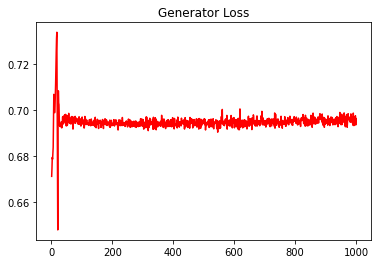

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02131336934497675


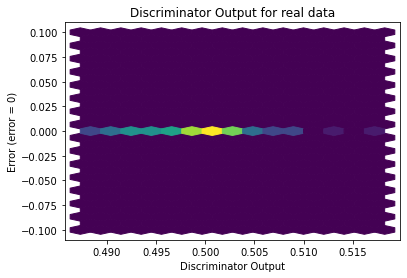

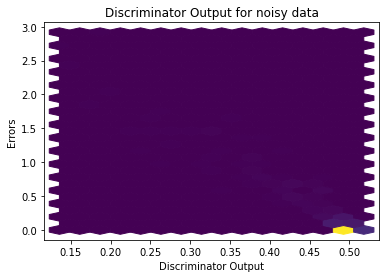

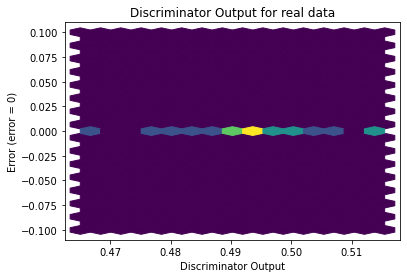

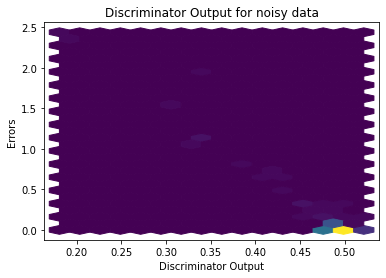

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


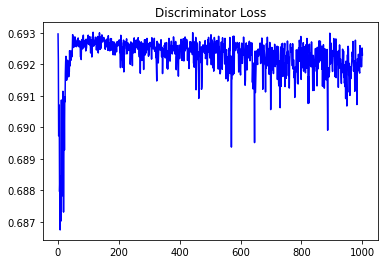

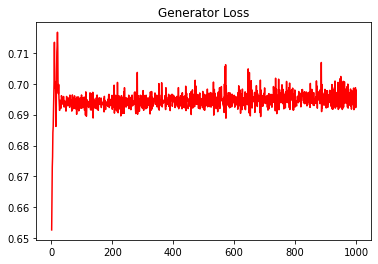

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009375066069758572


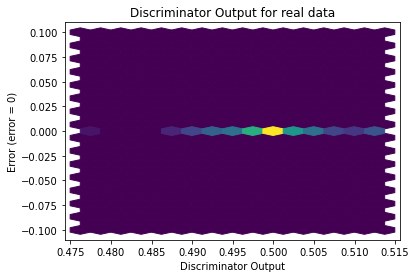

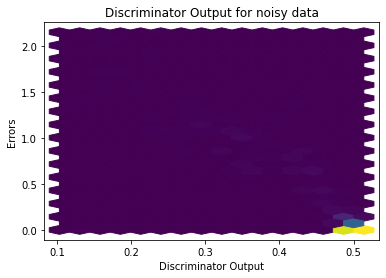

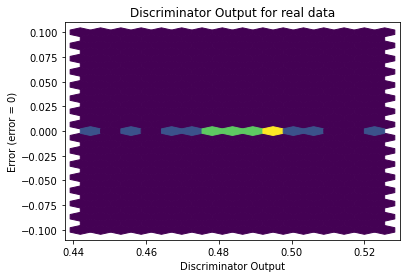

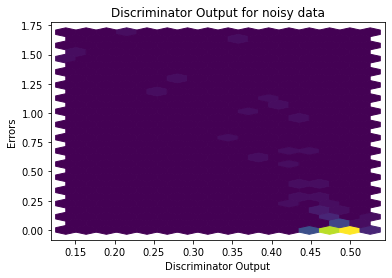

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5365]], requires_grad=True)
